# **IEOR 4404  Simulation (Fall 2020)**

**Homework 4 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 15**

Homework 4 consists of application-oriented exercises focusing on:
* sampling a Poisson process
* basics of `simpy`

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [1]:
#Your Name: Ziyang Zhang
#Your UNI: zz2732

In [2]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
!pip install simpy
import simpy
!pip install pynverse
import pynverse

#Exercise 1 [20 Points]

In this exercise, we simulate different arriving processes. Generating the arrival times for different processes is extremely important when we move on to model more complicated systems.

**[In this Exercise, No loops/list comprehension are allowed]**





##Q1.  [10 points]

Assume a process follows a homogeneous Poisson process with arrival rate $\lambda =5$. 


*  Without using loop or list comprehension, simulate the arrival times for the first 300 arrivals. Report the ordered arrival times for the last 10 arrivals.
(The arrival times should be generated at once)
* From the 300 sample arrival times, compute the sample inter-arrival times. For the first arrival. The inter-arrival time is equal to the arrival time. Based on visualizing the sample distribution and theoretical distribution, show that the inter-arrival time follows an exponential distribution.



  
 
 

In [3]:
# HOMOGENEOUS Poisson Process
# Arrival Rate: lambda = 5
# NO loop/list comprehension
# first 300 arrivals
# report ordered arrival times for the last 10 arrivals

In [4]:
lmbda = 5
inter_arr = -1/lmbda*np.log(np.random.rand(300))
arrivals = np.cumsum(inter_arr)        # ordered arrival times

# report the ordered arrival times for ths last 10 arrivals
last_10 = arrivals[-10:]
last_10

array([58.21964945, 58.65187457, 59.20751953, 59.34777609, 59.48766981,
       59.72053192, 59.89568428, 59.94427384, 60.04979234, 60.55169739])

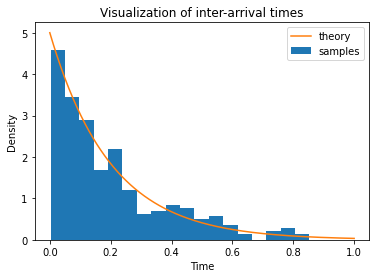

In [5]:
# compute inter-arrival times from arrival times
inter=np.diff(np.insert(arrivals,0,0))
# visualization of inter-arrival times
samples = inter
plt.hist(samples,bins=18,density=True,label='samples')
x=np.linspace(0,np.ceil(np.max(inter_arr)),1000)
pdf=lmbda*np.exp(-lmbda*x)
plt.plot(x,pdf,label='theory')
plt.title('Visualization of inter-arrival times')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

The inter-arrival time follows an exponential distribution based on the visualization plot above.

##Q2. [10 points]


Assume the process is a nonhomogenous Poisson process with arrival rate follows 

$\lambda(t)=exp(-t^{0.5}+2t), 0\leq t<5$



* Use the **thinning method** to simulate the arrival process from $t=0$ to $5$ at the same time. The generation of the proposals and the sampling should be done based on NumPy arrays. No loops or list comprehensions are allowed in this question. [Hint: Generate the arrivals from a homogeneous process at the same time, compute the acceptance rate of all the proposed arrivals at the same time, determine acceptance/rejection  of all the proposed arrivals at the same time]

* Report the number of arrivals for the simulation.

* Plot the sample distribution of the arrival times. 


In [6]:
# NON-HOMOGENEOUS Poisson Process
# NO loop/list comprehension
# THINNING method
# 0 <= t < 5

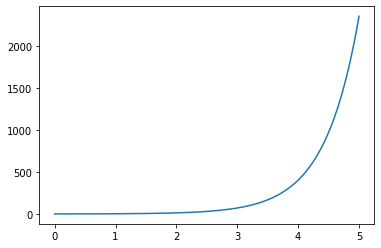

In [7]:
t=np.linspace(0,5,1000)
lmbda=np.exp(-t**0.5+2*t)
plt.plot(t,lmbda)
plt.show()

In [8]:
# compute the largest lambda for THINNING method
Lm=np.max(lmbda)
Lm

2354.1429737783815

In [9]:
# compute the area under the curve to be the normalizing constant for the theoretical distribution plot later
t=sympy.Symbol('t')
f=sympy.exp(-sympy.sqrt(t)+2*t)
big_lmbda=float(sympy.integrate(f,(t,0,5)))
big_lmbda

1337.175283657795

In [10]:
# thinning method to simulate arrival times in parallel
t=0
T=5
N=np.random.poisson(T*Lm)
arrival_times=np.sort(T*np.random.rand(N))
accept_rates=np.exp(-arrival_times**0.5+2*arrival_times)/Lm
bool_arr=np.random.rand(N)<accept_rates
arrival_times=arrival_times[bool_arr]
arrival_times

array([0.84320956, 1.76277363, 1.77272673, ..., 4.9971949 , 4.99760834,
       4.99830556])

In [11]:
# number of arrivals for this simulation
len(arrival_times)

1324

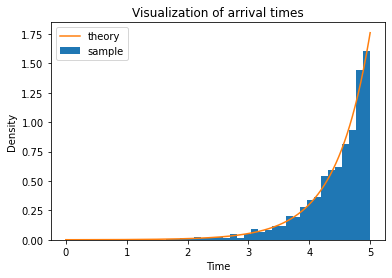

In [12]:
# visualization of the sample distribution of the arrival times
plt.hist(arrival_times,bins=int(len(arrival_times)**0.5),density=True,label='sample')
t=np.linspace(0,5,1000)
lmbda=np.exp(-t**0.5+2*t)/big_lmbda
plt.plot(t,lmbda,label='theory')
plt.title('Visualization of arrival times')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

#Exercise 2 [45 Points]


Assume the process is a nonhomogenous Poisson process with the following arrival rate:

$\lambda(t)=50*(sin(2*\pi* t)+2)$

The unit of time is day.

$sin(t)$ is  `sympy.sin(t)` is `simpy` and `np.sin(t)` in `numpy`. 
 

##Q1. [15 points]

* Plot the arrival rate between $t=0$ and $t=5$. 

* Create a function. Inside the function, use the **thinning method** to return the arrival time of the first 500 arrivals.  

* Run the function 100 times, plot the distribution of the arrival time of the 500th customer.  


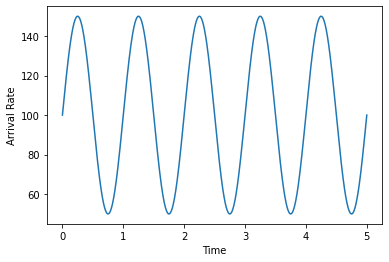

In [13]:
# visualization of arrival rate
t=np.linspace(0,5,1000)
lmbda=50*(np.sin(2*np.pi*t)+2)
plt.plot(t,lmbda)
plt.xlabel('Time')
plt.ylabel('Arrival Rate')
plt.show()

In [14]:
# compute the area under the curve to be the normalizing constant for the theoretical distribution plot later
t=sympy.Symbol('t')
f=50*(sympy.sin(2*sympy.pi*t)+2)
big_lmbda=float(sympy.integrate(f,(t,0,5)))
big_lmbda

500.0

In [15]:
# generate first 500 arrivals
# return arrival times
Lm=np.max(lmbda)
def thinning(N):
  t=0
  n=0
  inter_arrival=-1/Lm*np.log(np.random.rand())
  t+=inter_arrival
  arrivals=np.array([])

  while n<N:
    if np.random.rand()<50*(np.sin(2*np.pi*t)+2)/Lm:
        arrivals=np.append(arrivals,t)
        n+=1
    inter_arrival=-1/Lm*np.log(np.random.rand())
    t+=inter_arrival
  return arrivals

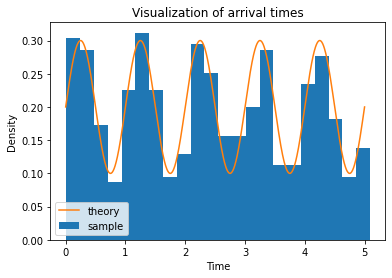

In [16]:
# visualization of the sample distribution of the arrival times
samples=thinning(500)
plt.hist(samples,bins=22,density=True,label='sample')
t=np.linspace(0,5,1000)
lmbda=50*(np.sin(2*np.pi*t)+2)/big_lmbda
plt.plot(t,lmbda,label='theory')
plt.title('Visualization of arrival times')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

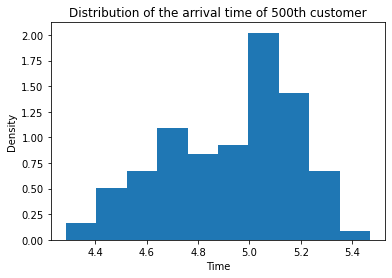

In [17]:
# run the function 'thinning' 100 times
# visualization of the sample distribution of the 500th arrival time
arr_500=[thinning(500)[-1] for i in range(100)]
plt.hist(arr_500,bins=10,density=True)
plt.title('Distribution of the arrival time of 500th customer')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

##Q2. [15 points]


* Generate the arrival time of the customers between 0 and 2 using ordered statistics method. [the inverse CDF does not have a closed-form solution. use numerical evaluation instead]
* Plot the sample distribution of the arrival times and the corresponding theoretical distribution in the same graph.

In [18]:
# Ordered Statistics method
# 0 <= t < 2
# return arrival times

In [19]:
# expected number of arrivals b/w 0 and 2
def Ex_arrivals(T):
  t=sympy.Symbol("t")
  lmt=50*(sympy.sin(2*sympy.pi*t)+2)
  return float(sympy.integrate(lmt,(t,0,T)))
Ex=Ex_arrivals(2)
Ex

200.0

In [20]:
# simulate number of arrivals b/w 0 and 2
N_arrivals=np.random.poisson(Ex)
N_arrivals

198

In [21]:
# theoretical distribution of the arrival times
t=sympy.Symbol("t")
pdf=50*(sympy.sin(2*sympy.pi*t)+2)/Ex
# find the CDF of the arrival times
cdf_exp=sympy.integrate(pdf,(t,0,t))
cdf_exp

0.5*t - 0.125*cos(2*pi*t)/pi + 0.125/pi

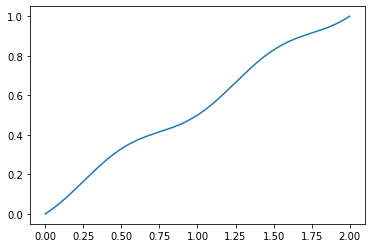

In [22]:
#check the CDF
t=np.linspace(0,2,1000)
cdf=t/2-np.cos(2*np.pi*t)/(8*np.pi)+1/(8*np.pi)
plt.plot(t,cdf)
plt.show()
#looks fine: continuous and monotonically increasing
#one-to-one mapping exists
#therefore, we can use 'pynverse.inversefunc' to simulate arrival times through numerical inversion

In [23]:
# Ordered Statistics method
# numerical evaluation method for inverse transform
def ordered_statistics(ex_N):
  Ex=ex_N                      # Expected number of arrivals
  N=np.random.poisson(Ex)     # Simulated number of arrivals
  #use pynverse.inversefunc(expr, y_values, domain) for numerical inversion 
  t=sympy.Symbol("t")
  pdf=50*(sympy.sin(2*sympy.pi*t)+2)/Ex
  cdf_exp=sympy.integrate(pdf,(t,0,t))
  expression=sympy.lambdify(t,cdf_exp,"numpy")

  return np.sort(pynverse.inversefunc(expression, np.random.rand(N), (0,2)))
                                    #  inverse CDF, u values, domain of t values

In [24]:
# generate sample arrival times
arr_t=ordered_statistics(200)
arr_t

array([0.00282842, 0.03058656, 0.03759715, 0.0504414 , 0.06739199,
       0.0980634 , 0.09914944, 0.10185686, 0.11219614, 0.11345843,
       0.13512772, 0.14054945, 0.14194091, 0.14218214, 0.14425893,
       0.15154989, 0.15456528, 0.1617299 , 0.17242125, 0.17885994,
       0.18040374, 0.18564201, 0.18908166, 0.19482473, 0.19840451,
       0.20014435, 0.21024511, 0.21415806, 0.21747441, 0.22977197,
       0.24186885, 0.24819507, 0.25106179, 0.25585248, 0.26444835,
       0.26570925, 0.26728181, 0.26985291, 0.27595248, 0.27854942,
       0.28211055, 0.28447617, 0.2910445 , 0.29797229, 0.30000344,
       0.30166763, 0.30799027, 0.31207266, 0.32670958, 0.33831193,
       0.3521391 , 0.35220895, 0.37014346, 0.3818959 , 0.38445719,
       0.3981489 , 0.40940059, 0.41415138, 0.41702253, 0.42839078,
       0.42842563, 0.4321153 , 0.4336922 , 0.4337206 , 0.44119807,
       0.45244674, 0.4537285 , 0.45894017, 0.46686517, 0.47569935,
       0.47983651, 0.50150837, 0.50363901, 0.5075679 , 0.50898

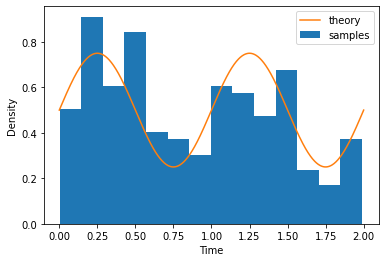

In [25]:
# visualization of sample distribution and theoretical distribution of the arrival times
samples = arr_t
plt.hist(samples,bins=14,density=True,label='samples')
x=np.linspace(0,2,1000)
pdf=50*(np.sin(2*np.pi*x)+2)/200
plt.plot(x,pdf,label='theory')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

##Q3. [15 points]

Upon arrival, each customer will decide whether to order a product.

The willingness to pay of a customer arrived between 0 and 2 follows:

$w= 5-t+\epsilon$

where $t$ is the arrival time of this customer and $\epsilon$ is a random sample from a normal distribution with mean=0 and standard deviation=$t$. Again, $t$ is the arrival time of the customer. [In other words, later arrivals will tend to have a lower willingness to pay. Also, the uncertainty in the willingness to pay becomes higher for later arrivals.]

The product is priced at $x$ for all customers. If $w$ of a customer is higher than the price $x$, the customers will order the product for $x$. The company will generate a profit of $x-1$ from this customer. Otherwise, the customer will not order the product. The company will not generate profit from this customer. 

* Construct a function. This function returns the total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **one round of simulation**. 
* Construct a second function. Inside this function, computes the average total profit generated from the customers arrived between 0 and 2 when the product is priced at $x$ for every customer based on **50 rounds of simulation**.
* Plot the relationship between $x$ and the average total profit from the customers arrived between 0 and 2 for $x=3, 3.1, 3.2, ..., 4.5$.

In [26]:
def Profit_sample(x):
  t = ordered_statistics(200)
  e = np.random.normal(0,t)
  w = 5-t+e
  return np.sum(w>x)*(x-1) 

def Profit_sample_mean(x):
  return np.mean(np.array([Profit_sample(x) for i in range(50)]))

In [27]:
# Test functions above using x=3
print(Profit_sample(3))
print(Profit_sample_mean(3))

336
326.16


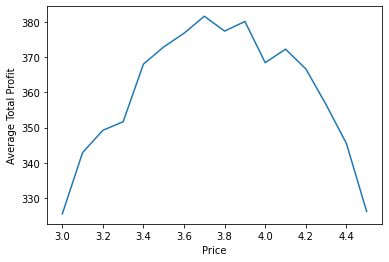

In [28]:
# visualization of the relationship between 'x' and 'average_total_profit'
# for x = 3, 3.1, 3.2, ... 4.5
x=np.arange(3.0,4.6,0.1)
averages=np.array([Profit_sample_mean(i) for i in np.arange(3.0,4.6,0.1)])
plt.plot(x,averages)
plt.xlabel('Price')
plt.ylabel('Average Total Profit')
plt.show()

Based on the plot above, on average, setting the price $x$ close to 3.8 will lead to the highest profit.

# Exercise 3 [15 Points]

Let's model the arrival of two types of customers arriving at a store. Type 1 customers arrive following a Poisson process with ($\lambda=2$). Type 2 customers arrive following a non-homogeneous Poisson process with ($\lambda=2t$).




## Q1. [15 points]
* Simulate the system using `simpy` until T=2. Print out the arrival time of each customer and which type this customer is. 
> * During the simulation, please generate the inter-arrival times one by one for each process.
> * Define the arrival of type 1 customers as Process 1
> * Define the arrival of type 2 customers as Process 2

For process 2, you can pre-generate the arrival times, then compute the inter-arrival times for `env.timeout()` in Process 2. 


In [29]:
# 'simpy' 
# From t=0 to T=2
# generate inter-arrival times one by one for each process

In [30]:
# Process 1 for type 1 customers: Homogeneous Poisson Process
def type_1():
  lm=2
  while True:
    inter_a=-1/lm*np.log(np.random.rand())
    arrival=env.timeout(inter_a)
    yield arrival
    print(env.now,'type 1')

# Process 2 for type 2 customers: Non-Homogeneous Poisson Process
def type_2():
  # using THINNING method to pre-generate arrival times
  t=np.linspace(0,2,1000)
  Lm=np.max(2*t)
  t=0
  T=2
  N=np.random.poisson(T*Lm)
  arrival_times=np.sort(T*np.random.rand(N))
  accept_rates=(2*arrival_times)/Lm
  bool_arr=np.random.rand(N)<accept_rates
  arrival_times=arrival_times[bool_arr]
  inter_arrival=np.diff(np.insert(arrival_times,0,0))
  i=0

  while i<len(arrival_times):
    inter=inter_arrival[i]
    arrival=env.timeout(inter)
    yield arrival
    print(env.now,'type 2')
    i+=1

# Test run
env=simpy.Environment()
Process_1=env.process(type_1())
Process_2=env.process(type_2())
T=2
env.run(until=T)

0.4263598316682169 type 2
0.525609591667715 type 2
0.7332294712709044 type 1
0.7955513127740022 type 1
0.8442404392052988 type 1
1.286808175246294 type 2
1.5463146919103399 type 2
1.670175665949268 type 2
1.8045436343369223 type 1
